In [1]:
import tikzmagic

In [2]:
%cd semi-determinization

/home/fblahoudek/research/seminator-experiments/semi-determinization


In [3]:
tool_names = {
    "yes.seminator#def" : "Seminator 2",
    "yes.seminator-1-1"  : "Seminator 1.1",
    "yes.seminator-1-2"  : "Seminator 1.2",
    "yes.owl#best" : "Owl+best+Spot",
    "yes.ncsb#best" : "Seminator 2",
    "yes.goal#pit" : "GOAL",
    "yes.goal#fri" : "Fribourg",
    "yes.buechic" : "Buechic",
    "yes.autfilt" : "Spot",
}

literature_nd


,timeout,parse error,incorrect,crash,no output
yes.seminator-1-1,1,0,0,0,0
yes.seminator-1-2,1,0,0,0,0


tool
yes.seminator#def     0.197490
yes.seminator-1-1    30.017600
yes.seminator-1-2    30.000300
yes.owl#best          0.505438
no.owl#best           0.297720
dtype: float64

random_nd


,timeout,parse error,incorrect,crash,no output
tool,,,,,


tool
yes.seminator#def    0.418309
yes.seminator-1-1    7.845140
yes.seminator-1-2    0.583907
yes.owl#best         0.401850
no.owl#best          0.334122
dtype: float64

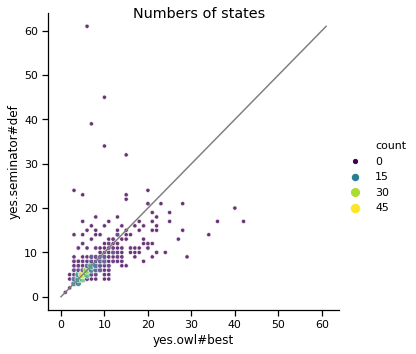

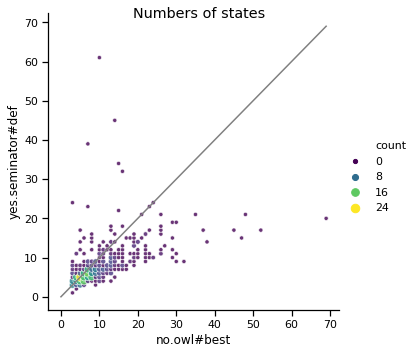

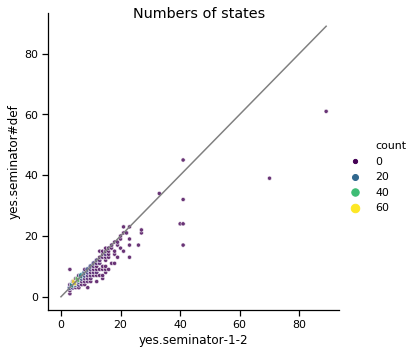

literature_nd


,yes.seminator#def,yes.seminator-1-1,yes.seminator-1-2,yes.owl#best,no.owl#best,V
yes.seminator#def,nan,12,8,12,16,48
yes.seminator-1-1,7,nan,0,3,13,23
yes.seminator-1-2,10,9,nan,10,15,44
yes.owl#best,8,16,9,nan,20,53
no.owl#best,4,7,5,0,nan,16


random_nd


,yes.seminator#def,yes.seminator-1-1,yes.seminator-1-2,yes.owl#best,no.owl#best,V
yes.seminator#def,nan,426,252,315,394,1387
yes.seminator-1-1,45,nan,24,128,222,419
yes.seminator-1-2,149,327,nan,288,362,1126
yes.owl#best,165,363,201,nan,486,1215
no.owl#best,103,276,137,0,nan,516


literature_sd


,timeout,parse error,incorrect,crash,no output
no.owl#a,1,0,0,0,0
yes.owl#a,1,0,0,0,0


tool
min(count)             0.034766
no.owl#a              30.000400
no.owl#best            0.917197
no.owl#s               0.917197
no.seminator#def       0.055873
no.seminator#sba       0.065737
no.seminator#tba       0.067963
no.seminator#tgba      0.057469
no.seminator-1-1       0.065787
no.seminator-1-2       0.059503
yes.owl#a             30.000500
yes.owl#best           1.752060
yes.owl#s              1.752060
yes.seminator#def      0.073693
yes.seminator#sba      0.074375
yes.seminator#tba      0.092564
yes.seminator#tgba     0.105345
yes.seminator-1-1      0.114068
yes.seminator-1-2      0.118711
dtype: float64

literature_det


,timeout,parse error,incorrect,crash,no output
tool,,,,,


tool
min(count)            0.100263
no.owl#a              7.737870
no.owl#best           0.168941
no.owl#s              0.714064
no.seminator#def      0.059072
no.seminator#sba      0.059362
no.seminator#tba      0.054489
no.seminator#tgba     0.069948
no.seminator-1-1      0.063631
no.seminator-1-2      0.070395
yes.owl#a             9.751100
yes.owl#best          1.659090
yes.owl#s             2.904100
yes.seminator#def     0.100263
yes.seminator#sba     0.085377
yes.seminator#tba     0.076929
yes.seminator#tgba    0.069277
yes.seminator-1-1     0.099011
yes.seminator-1-2     0.108549
dtype: float64

random_sd


,timeout,parse error,incorrect,crash,no output
tool,,,,,


tool
min(count)            0.093089
no.owl#a              0.246978
no.owl#best           0.165076
no.owl#s              0.183502
no.seminator#def      0.099493
no.seminator#sba      0.069226
no.seminator#tba      0.076668
no.seminator#tgba     0.071572
no.seminator-1-1      0.088676
no.seminator-1-2      0.101028
yes.owl#a             0.392236
yes.owl#best          0.240683
yes.owl#s             0.240683
yes.seminator#def     0.102088
yes.seminator#sba     0.086770
yes.seminator#tba     0.084375
yes.seminator#tgba    0.100318
yes.seminator-1-1     0.088595
yes.seminator-1-2     0.129836
dtype: float64

random_det


,timeout,parse error,incorrect,crash,no output
tool,,,,,


tool
min(count)            0.052428
no.owl#a              0.052428
no.owl#best           0.052428
no.owl#s              0.070573
no.seminator#def      0.072205
no.seminator#sba      0.077062
no.seminator#tba      0.081474
no.seminator#tgba     0.088180
no.seminator-1-1      0.074690
no.seminator-1-2      0.074745
yes.owl#a             0.118696
yes.owl#best          0.118696
yes.owl#s             0.131304
yes.seminator#def     0.070684
yes.seminator#sba     0.073177
yes.seminator#tba     0.081507
yes.seminator#tgba    0.074737
yes.seminator-1-1     0.079481
yes.seminator-1-2     0.098182
dtype: float64

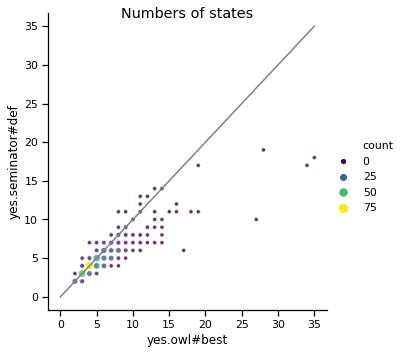

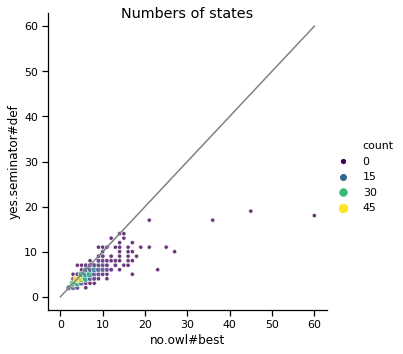

literature_sd


,yes.seminator#def,yes.owl#best,no.owl#best,V
yes.seminator#def,nan,32,40,72
yes.owl#best,2,nan,38,40
no.owl#best,2,0,nan,2


literature_det


,yes.seminator#def,yes.owl#best,no.owl#best,V
yes.seminator#def,nan,32,66,98
yes.owl#best,0,nan,66,66
no.owl#best,0,0,nan,0


random_sd


,yes.seminator#def,yes.owl#best,no.owl#best,V
yes.seminator#def,nan,250,402,652
yes.owl#best,135,nan,423,558
no.owl#best,67,0,nan,67


random_det


,yes.seminator#def,yes.owl#best,no.owl#best,V
yes.seminator#def,nan,53,197,250
yes.owl#best,4,nan,195,199
no.owl#best,0,0,nan,0


  16001 1224283 7507123 data/random_sd_merged.csv
   3217  309869 1935768 data/literature_sd_merged.csv


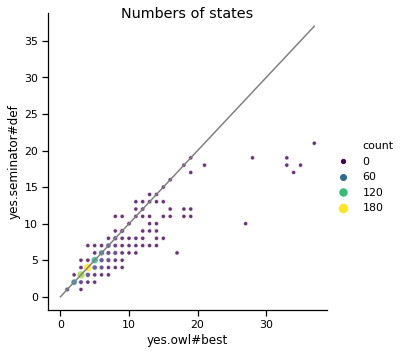

In [4]:
%run Results-owl-best.ipynb
%run Results-owl-best-sd.ipynb

In [5]:
nd = nd_benchmarks["random_nd"]
sd = m_benchmarks["random_sd_merged"]

In [6]:
def scatter_plot(df, log=None, size=(7,6.5), kw=None, clip=None, add_count = True, marksize="1.2pt", **kwargs):
    if kw is None:
        kw = kwargs
    t1, t2, _ = df.columns.values
    vals = [f'({v1},{v2}) [{c}]\n' for v1,v2,c in df.values]
    plots = '''\\addplot[
    scatter, scatter src=explicit, 
    only marks, fill opacity=0.5,
    draw opacity=0] coordinates
    {{{}}};'''.format(' '.join(vals))
    start_line = 0 if log is None else 1
    line = f'\\addplot[gray,domain={start_line}:{min(df.max(axis=0)[:2])+1}]{{x}};'
    axis = 'axis'
    mins = 'xmin=0,ymin=0,'
    clip_str = ''
    if clip is not None:
        clip_str = '\\draw[red,thick] ({},{}) rectangle ({},{});'.format(*clip)
    if log:
        if log == 'both':
            axis = 'loglogaxis'
            mins = 'xmin=1,ymin=1,'
        else:
            axis = f'semilog{log}axis'
            mins = mins + f'{log}min=1,'
    args = ''
    if kw is not None:
        if 'title' in kw and add_count:
            kw['title'] = '{{{} ({})}}'.format(kw['title'],df['count'].sum())
        args = ['{}={},\n'.format(k,v) for k,v in kw.items()]
        args = ''.join(args)
    res = f'''%\\begin{{tikzpicture}}
\\pgfplotsset{{every tick label/.append style={{font=\\tiny}}}}
\\pgfplotsset{{colorbar/width=.1cm}}
\\pgfplotsset{{title style={{align=center,
                        font=\\small}}}}
\\pgfplotsset{{
colorbar shift/.style={{xshift=.1cm}},
}}
\\pgfplotsset{{compat=1.16}}
\\begin{{{axis}}}[
{mins}
colorbar style={{line width=.1pt}},
colorbar,
mark size={marksize},
%thick,
axis x line* = bottom,
axis y line* = left,
width={size[0]}cm, height={size[1]}cm, 
xlabel near ticks,
ylabel near ticks,
xlabel={{{t1}}},
ylabel={{{t2}}},
{args}%
]
{plots}%
{line}%
{clip_str}%
\\end{{{axis}}}
%\\end{{tikzpicture}}
'''
    return res

In [7]:
def display_tikz(tikzcode, scale=1):
    preamble = r"""\usepackage{pgfplots}
\usepackage{xcolor}
"""
    return tikzmagic.tikzmagic.tikz(f"-s={scale} -b=0 --log --engine=pdflatex -x='{preamble}'", tikzcode)

def get_tikzcode(b, t1, t2, **kwargs):
    data = b.get_plot_data(t1,t2,include_equal=True)
    data = data.rename(columns=tool_names)
    tikz = scatter_plot(data, **kwargs)
    return tikz

In [8]:
sc_dir = "/home/fblahoudek/research/semideterminization-lmcs/fig"
!mkdir -p {sc_dir}

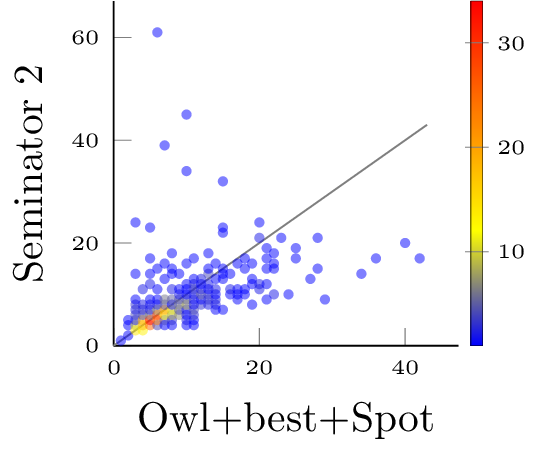

In [9]:
t1 = "yes.owl#best"
t2 = "yes.seminator#def"
tikzcode = get_tikzcode(nd, t1, t2, size=(4.5,4.5))#, title=r"not semi-deterministic\\random")
print(tikzcode, file=(open(f"{sc_dir}/owl_sem_nd.tikz","w")))
display_tikz(tikzcode)

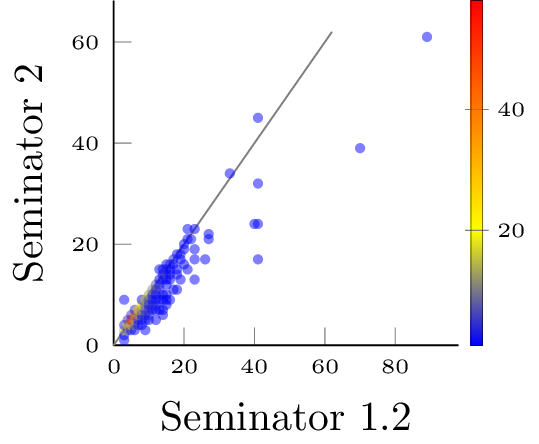

In [10]:
t1 = "yes.seminator-1-2"
t2 = "yes.seminator#def"
tikzcode = get_tikzcode(nd, t1, t2, size=(4.5,4.5))#, title=r"not semi-deterministic\\random")
print(tikzcode, file=(open(f"{sc_dir}/sem12_2_nd.tikz","w")))
display_tikz(tikzcode)

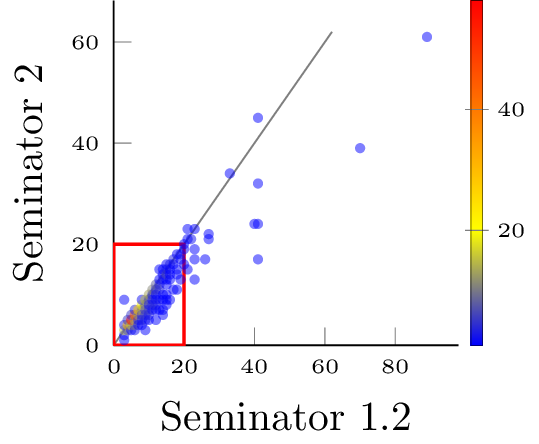

In [11]:
t1 = "yes.seminator-1-2"
t2 = "yes.seminator#def"
tikzcode = get_tikzcode(nd, t1, t2, size=(4.5,4.5), clip=(0, 0, 20, 20))#, title=r"not semi-deterministic\\random")
#print(tikzcode, file=(open(f"{sc_dir}/sem12_2_nd.tikz","w")))
display_tikz(tikzcode)

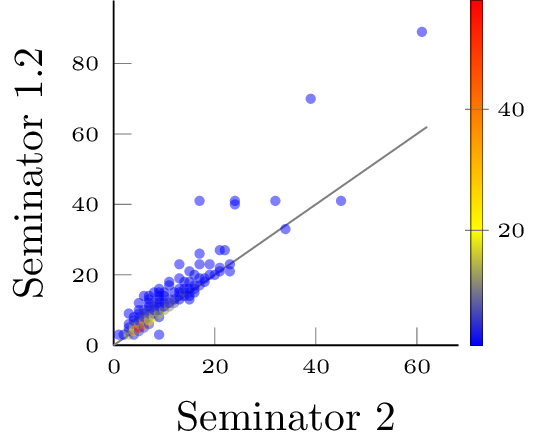

In [12]:
t1 = "yes.seminator-1-2"
t2 = "yes.seminator#def"
tikzcode = get_tikzcode(nd, t2, t1, size=(4.5,4.5))#, title=r"not semi-deterministic\\random")
print(tikzcode, file=(open(f"{sc_dir}/sem2_12_nd.tikz","w")))
display_tikz(tikzcode)

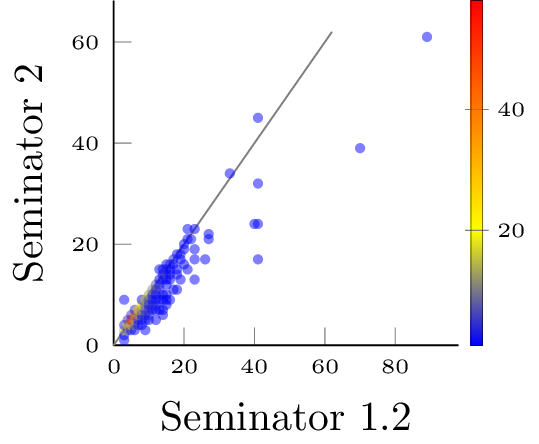

In [13]:
t1 = "yes.seminator-1-2"
t2 = "yes.seminator#def"
tikzcode = get_tikzcode(nd, t1, t2, size=(4.5,4.5), )#, title=r"not semi-deterministic\\random")
print(tikzcode, file=(open(f"{sc_dir}/sem12_2_nd.tikz","w")))
display_tikz(tikzcode)

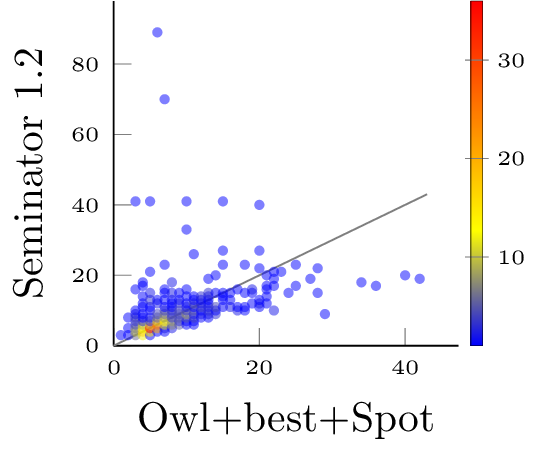

In [14]:
t1 = "yes.owl#best"
t2 = "yes.seminator-1-2"
tikzcode = get_tikzcode(nd, t1, t2, size=(4.5,4.5))#, title=r"(semi-)deterministic\\random")
print(tikzcode, file=(open(f"{sc_dir}/owl_sem_12_nd.tikz","w")))
display_tikz(tikzcode)

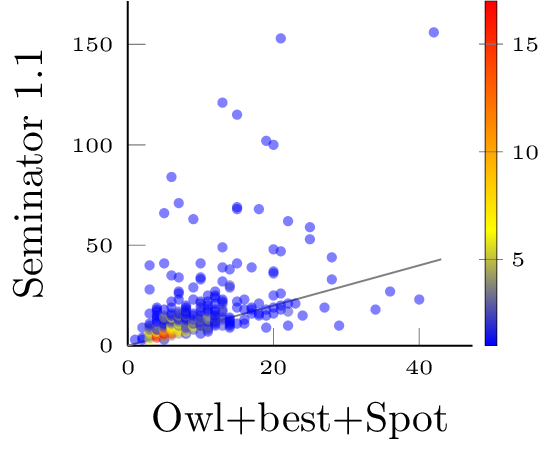

In [15]:
t1 = "yes.owl#best"
t2 = "yes.seminator-1-1"
tikzcode = get_tikzcode(nd, t1, t2, size=(4.5,4.5))#, title=r"(semi-)deterministic\\random")
print(tikzcode, file=(open(f"{sc_dir}/owl_sem_11_nd.tikz","w")))
display_tikz(tikzcode)

### Complement

/home/fblahoudek/research/seminator-experiments/complement


'nd'

,literature_nd,random_nd
tool,,
yes.autfilt,197,5507
yes.buechic,328,6343
yes.goal#fri,196,5359
yes.goal#pit,261,7615
yes.ncsb#best,195,5082


,yes.autfilt,yes.ncsb#best,yes.goal#fri,yes.goal#pit,yes.buechic,V
yes.autfilt,nan,7,5,11,18,41
yes.ncsb#best,12,nan,6,15,18,51
yes.goal#fri,12,9,nan,15,19,55
yes.goal#pit,6,2,1,nan,16,25
yes.buechic,2,2,1,4,nan,9


,yes.autfilt,yes.ncsb#best,yes.goal#fri,yes.goal#pit,yes.buechic,V
yes.autfilt,nan,214,220,347,373,1154
yes.ncsb#best,242,nan,240,361,400,1243
yes.goal#fri,233,230,nan,361,387,1211
yes.goal#pit,108,100,94,nan,286,588
yes.buechic,126,98,113,213,nan,550


'sd'

,literature_sd,random_sd
tool,,
yes.autfilt,190,2892
yes.buechic,833,5766
yes.goal#fri,290,3367
yes.goal#pit,331,3389
yes.ncsb#best,210,2828


,yes.autfilt,yes.ncsb#best,yes.goal#fri,yes.goal#pit,yes.buechic,V
yes.autfilt,nan,11,22,18,46,97
yes.ncsb#best,15,nan,24,12,46,97
yes.goal#fri,12,2,nan,10,44,68
yes.goal#pit,9,0,16,nan,41,66
yes.buechic,3,3,4,8,nan,18


,yes.autfilt,yes.ncsb#best,yes.goal#fri,yes.goal#pit,yes.buechic,V
yes.autfilt,nan,108,237,210,483,1038
yes.ncsb#best,142,nan,246,215,486,1089
yes.goal#fri,109,91,nan,140,473,813
yes.goal#pit,72,56,161,nan,451,740
yes.buechic,13,14,24,48,nan,99


'det'

,literature_det,random_det
tool,,
yes.autfilt,611,2439
yes.buechic,1388,3632
yes.goal#fri,627,2493
yes.goal#pit,617,2454
yes.ncsb#best,622,2473


,yes.autfilt,yes.ncsb#best,yes.goal#fri,yes.goal#pit,yes.buechic,V
yes.autfilt,nan,14,15,12,152,193
yes.ncsb#best,14,nan,8,4,148,174
yes.goal#fri,15,13,nan,5,150,183
yes.goal#pit,15,11,6,nan,150,182
yes.buechic,0,4,2,2,nan,8


,yes.autfilt,yes.ncsb#best,yes.goal#fri,yes.goal#pit,yes.buechic,V
yes.autfilt,nan,64,45,46,494,649
yes.ncsb#best,9,nan,30,16,489,544
yes.goal#fri,20,57,nan,36,491,604
yes.goal#pit,11,48,21,nan,491,571
yes.buechic,0,5,3,3,nan,11


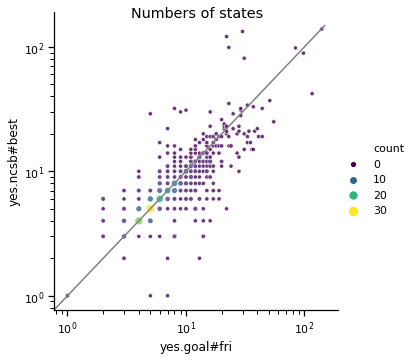

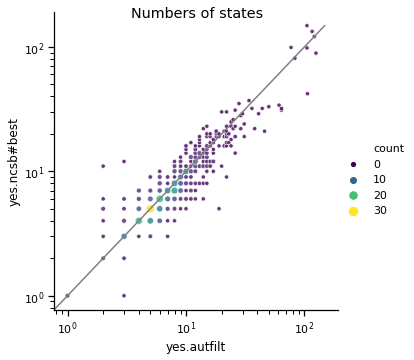

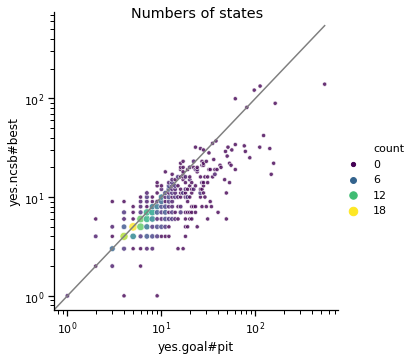

'nd'

,literature_nd,random_nd
tool,,
yes.autfilt,197,5507
yes.buechic,328,6343
yes.goal#fri,196,5359
yes.goal#pit,261,7615
yes.ncsb#best,195,5082


,no.autfilt,no.ncsb#best,no.goal#fri,no.goal#pit,no.buechic,V
no.autfilt,nan,19,20,18,17,74
no.ncsb#best,1,nan,17,8,5,31
no.goal#fri,0,3,nan,0,4,7
no.goal#pit,2,12,19,nan,7,40
no.buechic,3,15,16,13,nan,47


,no.autfilt,no.ncsb#best,no.goal#fri,no.goal#pit,no.buechic,V
no.autfilt,nan,443,500,450,363,1756
no.ncsb#best,56,nan,475,328,211,1070
no.goal#fri,0,25,nan,2,25,52
no.goal#pit,44,163,496,nan,166,869
no.buechic,136,289,475,333,nan,1233


'sd'

,literature_sd,random_sd
tool,,
yes.autfilt,190,2892
yes.buechic,833,5766
yes.goal#fri,290,3367
yes.goal#pit,331,3389
yes.ncsb#best,210,2828


,no.autfilt,no.ncsb#best,no.goal#fri,no.goal#pit,no.buechic,V
no.autfilt,nan,28,49,48,45,170
no.ncsb#best,8,nan,49,38,42,137
no.goal#fri,0,0,nan,1,25,26
no.goal#pit,0,3,47,nan,35,85
no.buechic,4,7,23,13,nan,47


,no.autfilt,no.ncsb#best,no.goal#fri,no.goal#pit,no.buechic,V
no.autfilt,nan,372,500,446,471,1789
no.ncsb#best,50,nan,500,295,369,1214
no.goal#fri,0,0,nan,0,107,107
no.goal#pit,27,107,500,nan,314,948
no.buechic,28,131,391,177,nan,727


'det'

,literature_det,random_det
tool,,
yes.autfilt,611,2439
yes.buechic,1388,3632
yes.goal#fri,627,2493
yes.goal#pit,617,2454
yes.ncsb#best,622,2473


,no.autfilt,no.ncsb#best,no.goal#fri,no.goal#pit,no.buechic,V
no.autfilt,nan,141,152,113,152,558
no.ncsb#best,0,nan,150,55,144,349
no.goal#fri,0,0,nan,0,90,90
no.goal#pit,0,77,152,nan,150,379
no.buechic,0,7,61,2,nan,70


,no.autfilt,no.ncsb#best,no.goal#fri,no.goal#pit,no.buechic,V
no.autfilt,nan,449,500,433,500,1882
no.ncsb#best,0,nan,490,72,477,1039
no.goal#fri,0,8,nan,6,207,221
no.goal#pit,0,142,492,nan,497,1131
no.buechic,0,22,288,3,nan,313


'literature_det'

,timeout,parse error,incorrect,crash,no output
no.buechic,4,0,0,0,0
yes.buechic,4,0,0,0,0


'literature_sd'

,timeout,parse error,incorrect,crash,no output
no.buechic,1,0,0,0,0
no.goal#fri,1,0,0,0,0
no.goal#pit,2,0,0,0,0
yes.buechic,1,0,0,0,0
yes.goal#fri,1,0,0,0,0
yes.goal#pit,1,0,0,0,0


'literature_nd'

,timeout,parse error,incorrect,crash,no output
no.buechic,2,0,0,1,0
no.goal#fri,1,0,0,0,0
no.goal#pit,1,0,0,0,0
yes.buechic,2,0,0,0,0
yes.goal#fri,1,0,0,0,0
yes.goal#pit,1,0,0,0,0


'random_det'

,timeout,parse error,incorrect,crash,no output
no.goal#fri,0,2,0,0,0
no.goal#pit,0,2,0,0,0
yes.goal#fri,0,0,0,2,0
yes.goal#pit,0,0,0,2,0


'random_sd'

,timeout,parse error,incorrect,crash,no output
tool,,,,,


'random_nd'

,timeout,parse error,incorrect,crash,no output
no.buechic,3,0,0,0,0
no.goal#fri,2,0,0,0,0
no.goal#pit,4,0,0,0,0
yes.autfilt,1,0,0,0,0
yes.buechic,3,0,0,0,0
yes.goal#fri,3,0,0,0,0
yes.goal#pit,5,0,0,0,0
yes.ncsb#best,1,0,0,0,0
yes.ncsb#pldi,1,0,0,0,0
yes.ncsb#spot,1,0,0,0,0


In [16]:
%cd ../complement
%run Results_BA.ipynb

In [17]:
c_nd = benchmarks["random_nd"]

In [18]:
tool_names = {
    "yes.seminator#def" : "Seminator 2",
    "yes.owl#best" : "Owl+best+Spot",
    "yes.ncsb#best" : "Seminator 2",
    "yes.goal#pit" : "GOAL",
    "yes.goal#fri" : "Fribourg+Spot",
    "yes.buechic" : "Buechic",
    "yes.autfilt" : "Spot",
}

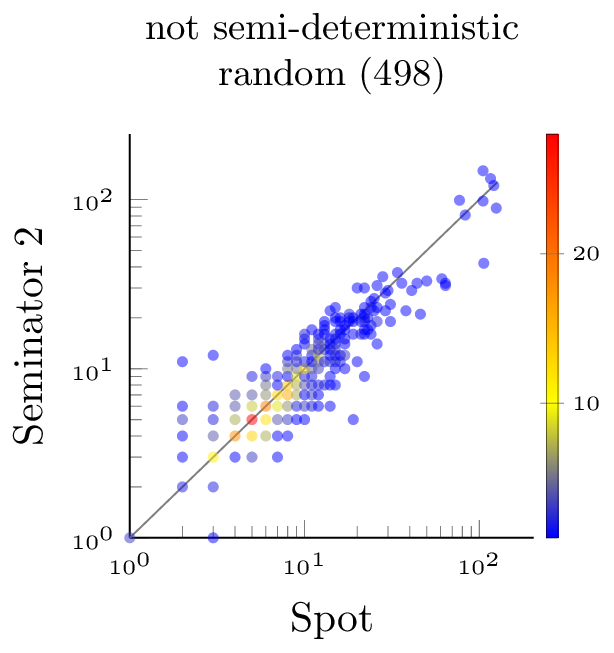

In [19]:
t1 = "yes.autfilt"
t2 = "yes.ncsb#best"
tikzcode = get_tikzcode(c_nd, t1, t2, size=(5,5), title=r"not semi-deterministic\\random", marksize="1.3pt", log="both")
print(tikzcode, file=(open(f"{sc_dir}/spot_sem_nd.tikz","w")))
display_tikz(tikzcode)

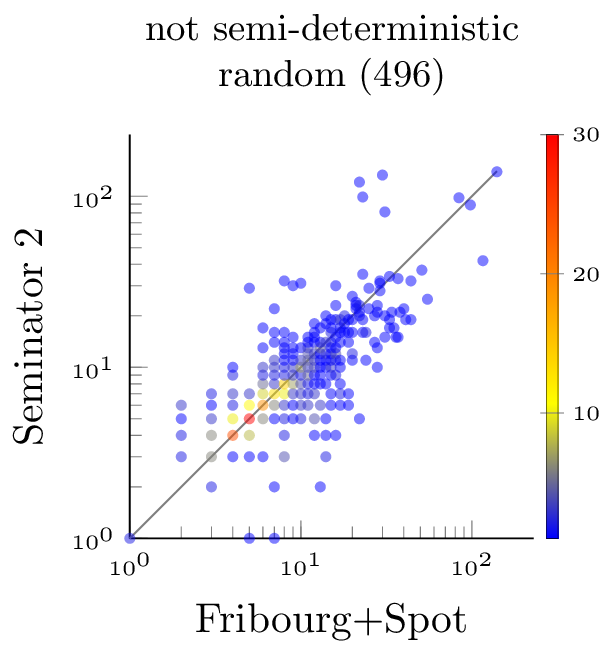

In [20]:
t1 = "yes.goal#fri"
t2 = "yes.ncsb#best"
tikzcode = get_tikzcode(c_nd, t1, t2, size=(5,5), title=r"not semi-deterministic\\random", marksize="1.3pt", log="both")
print(tikzcode, file=(open(f"{sc_dir}/frib_sem_nd.tikz","w")))
display_tikz(tikzcode)

In [21]:
t = b.values.time

In [22]:
tools = ["yes.buechic","yes.goal#pit","yes.goal#fri","yes.ncsb#best","yes.autfilt"]

In [23]:
tool_names = {
    "yes.seminator#def" : "Seminator 2",
    "yes.owl#best" : "Owl+best+Spot",
    "yes.ncsb#best" : "Seminator 2",
    "yes.goal#pit" : "GOAL+Spot",
    "yes.goal#fri" : "Fribourg+Spot",
    "yes.buechic" : "Buechic+Spot",
    "yes.autfilt" : "Spot",
}

In [24]:
time = pd.DataFrame()
for n,b in benchmarks.items():
    t = b.values.time
    time_data = t[tools].rename(columns=tool_names)
    time_data.columns.name = None
    time = time.append(time_data)

#runt = sns.swarmplot(data=time)

In [25]:
def sorted_plot(data,filename=None,short=False, tresh=None, log=False):
    tool_coord = '''\\addplot coordinates {{{}}};%
\\addlegendentry{{{}}}%
'''
    axis = "axis" if not log else "semilogyaxis"
    sh_width = '6cm'
    width = sh_width if short else '16cm'
    v = data
    coords_str = ''
    for tool in data.columns:
        values = sorted(list(v[tool]))
        if tresh is not None:
            t_coords = [f'({i},{values[i]})' for i in range(len(values)) if values[i] < tresh]
        else:
            t_coords = [f'({i},{values[i]})' for i in range(len(values))]
        t_coords_str = ' '.join(t_coords)
        coords_str += tool_coord.format(t_coords_str,tool)
    res = f'''\\begin{{tikzpicture}}
\\pgfplotsset{{every axis legend/.append style={{
cells={{anchor=west}},
draw=none,
}}}}
\\pgfplotsset{{compat=1.14}}
\\begin{{axis}}[
xmin=0,xmax={len(v)},
very thick,
no markers,
cycle list name=linestyles*,
axis x line* = bottom,
axis y line* = left,
width={width}, height=7cm, 
xlabel={{$n$-th fastest run FIXME}},
ylabel={{time}},
legend pos = north west,
cycle list={{%
{{green, solid}},
{{blue, densely dashed}},
{{red, dashdotdotted}},
{{black, densely dotted}},
{{brown, loosely dashdotted}}
}}
]
{coords_str}
\\end{{{axis}}}
\\end{{tikzpicture}}'''
    if filename is not None:
        print(res,file=open(filename,'w'))
    else: 
        return res



In [26]:
tresh = 10
data = time[(time["Fribourg+Spot"]>tresh) | (time["GOAL+Spot"]>tresh) | (time["Buechic+Spot"]>tresh) | (time["Seminator 2"]>tresh) | (time["Spot"]>tresh)]
len(data)

89

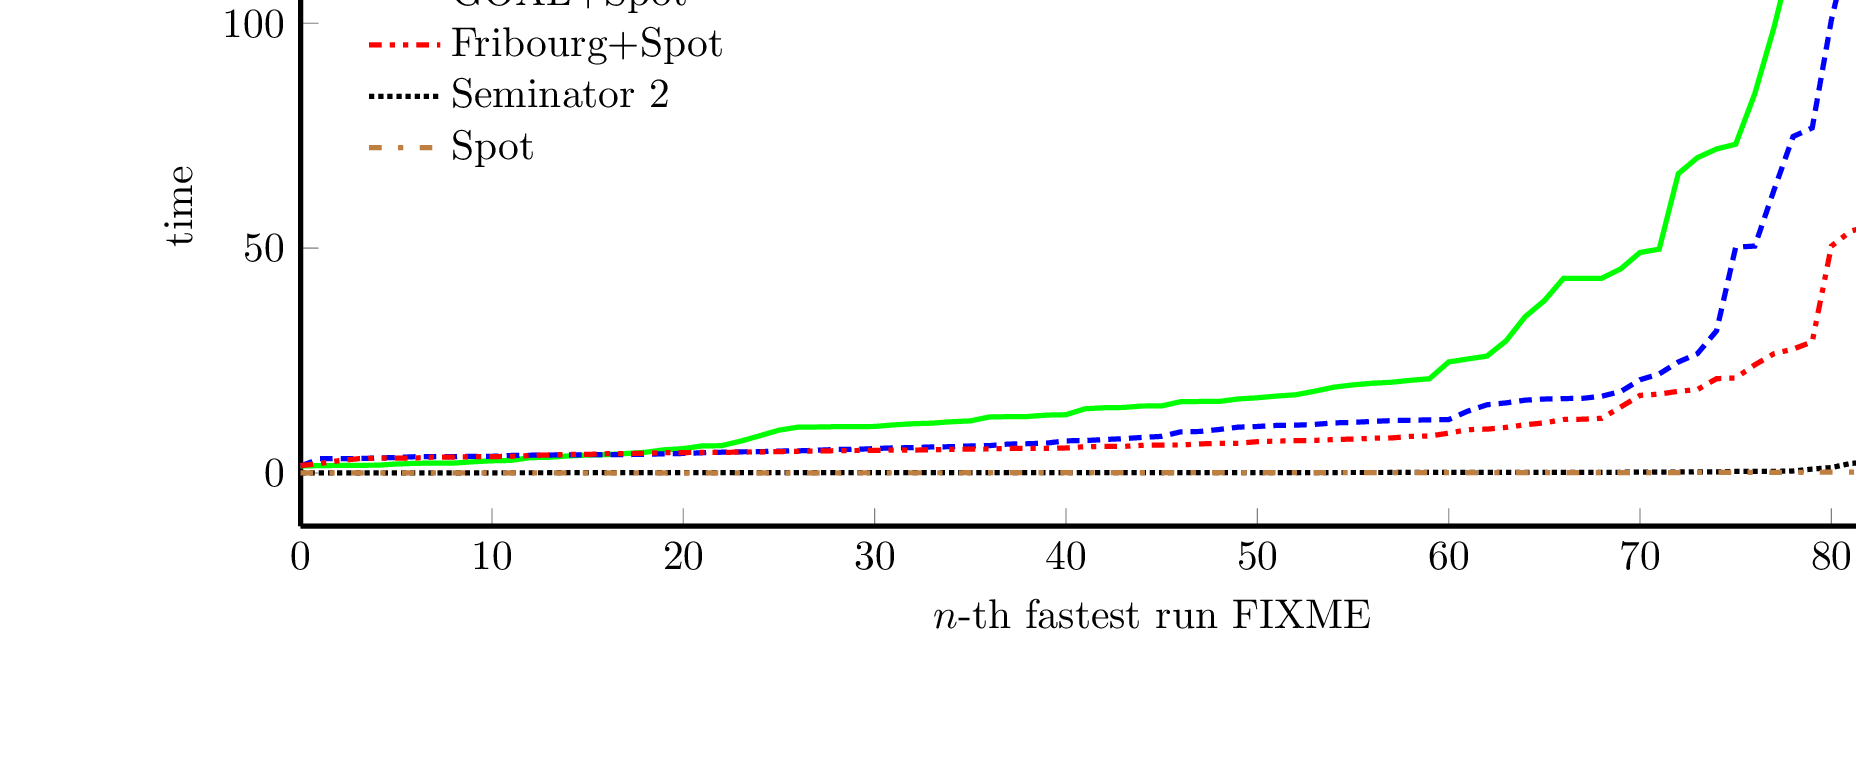

In [27]:
display_tikz(sorted_plot(data, short=False, tresh=120))

In [23]:
print(sorted_plot(data, short=True, tresh=120), file=open("/home/fblahoudek/research/semideterminization-lmcs/fig/time_cactus.tikz","w"))